In [1]:
# Import the necessary libraries in order to run the code.     #

#import argparse
import xarray as xr
import matplotlib.pyplot as plt
#import cartopy.crs as ccrs
import numpy as np
import pandas as pd
#from datetime import datetime
#from matplotlib.backends.backend_pdf import PdfPages
import xbpch
#from glob import glob
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
#from dask.diagnostics import ProgressBar
#from matplotlib import colorbar, colors
#from decimal import Decimal
#import statistics
#from sklearn.metrics import r2_score
%matplotlib inline

/home/brittany/anaconda3/envs/geoschem/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/brittany/anaconda3/envs/geoschem/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Import the observed data from the sites     
Hgobs = pd.read_csv('~/Documents/HG/data/TGMSiteMonthly1.csv', na_values=(-9999))



# Name the xbpch files for the reference and new models
OLD = '/home/brittany/Documents/HG/pythonHgBenchmark/trac_avg.geosfp_2x25_Hg.v12-01.bpch'
NEW = '/home/brittany/Documents/HG/pythonHgBenchmark/trac_avg.geosfp_2x25_Hg.v12-01.new.bpch'



# Upload/open the data from the models 
OLD_ds = (xbpch.open_bpchdataset(OLD))
NEW_ds = (xbpch.open_bpchdataset(NEW))
    
    


/home/brittany/anaconda3/envs/geoschem/lib/python3.6/site-packages/pandas/io/parsers.py:710: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [3]:
# Arrange the data by order of latitude and ensure when graphs are plotted the data is sequential
Graph_order=Hgobs.sort_values(by=['Lat'], ascending=0)
HgobsOrder=Graph_order.sort_values(by=['Month'])



# Make a variable for the unit conversion factor to obtain ng/m^3
Unit_Conversion= 8.93


# Extract and add together Hg0 and Hg2 at the surface from the reference model multiplying by the unit converion factor 
# to obtain values for Total Gaseous Mercury.
OLD_Hg0 =((OLD_ds['IJ_AVG_S_Hg0'].isel(lev=0)) * Unit_Conversion)                              
OLD_Hg2 =((OLD_ds['IJ_AVG_S_Hg2'].isel(lev=0)) * Unit_Conversion)                
TGM_Old = (OLD_Hg0 + OLD_Hg2)


# Extract and add together Hg0 and Hg2 at the surface from the new model multiplying by the unit converion factor 
# to obtain values for Total Gaseous Mercury.
NEW_Hg0 =((NEW_ds['IJ_AVG_S_Hg0'].isel(lev=0) * Unit_Conversion))                         
NEW_Hg2 =((NEW_ds['IJ_AVG_S_Hg2'].isel(lev=0) * Unit_Conversion))
TGM_New = NEW_Hg0 + NEW_Hg2

<Figure size 432x288 with 0 Axes>

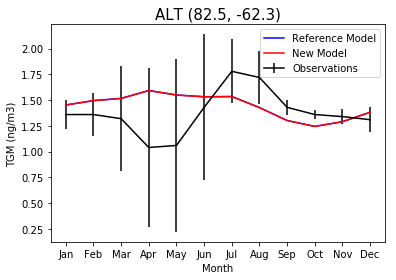

<Figure size 432x288 with 0 Axes>

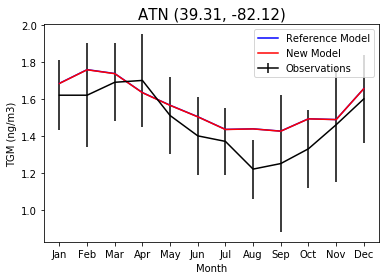

/home/brittany/anaconda3/envs/geoschem/lib/python3.6/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


<Figure size 432x288 with 0 Axes>

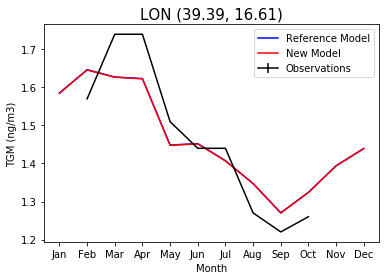

<Figure size 432x288 with 0 Axes>

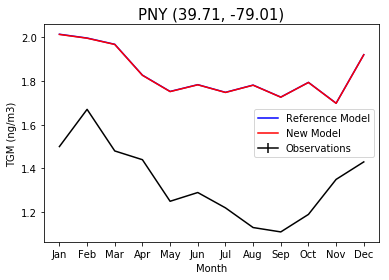

<Figure size 432x288 with 0 Axes>

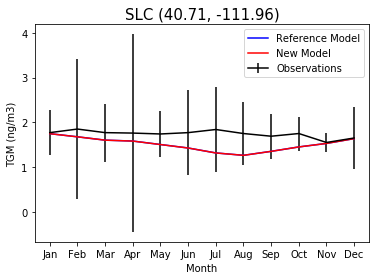

<Figure size 432x288 with 0 Axes>

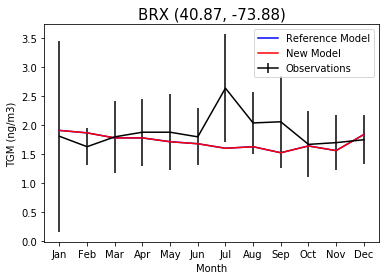

<Figure size 432x288 with 0 Axes>

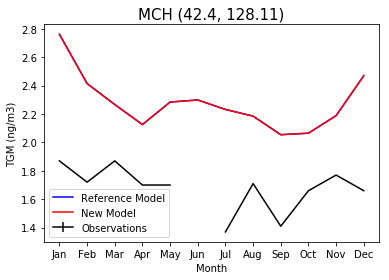

<Figure size 432x288 with 0 Axes>

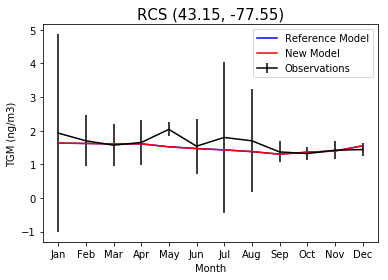

<Figure size 432x288 with 0 Axes>

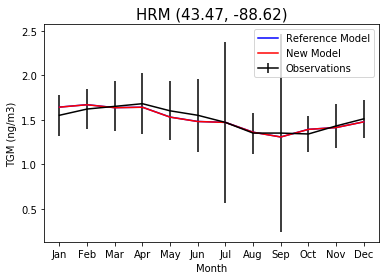

<Figure size 432x288 with 0 Axes>

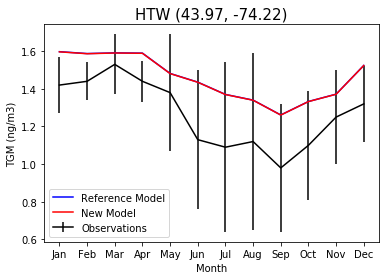

<Figure size 432x288 with 0 Axes>

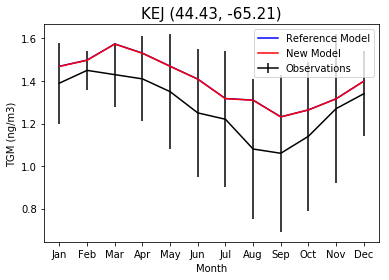

<Figure size 432x288 with 0 Axes>

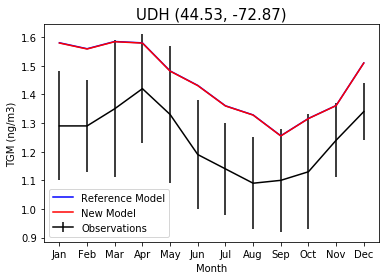

<Figure size 432x288 with 0 Axes>

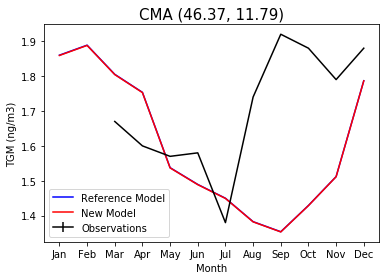

<Figure size 432x288 with 0 Axes>

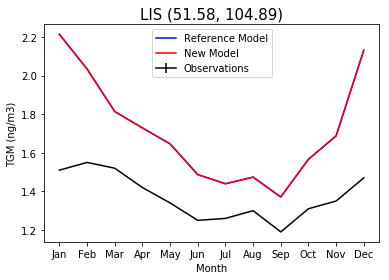

<Figure size 432x288 with 0 Axes>

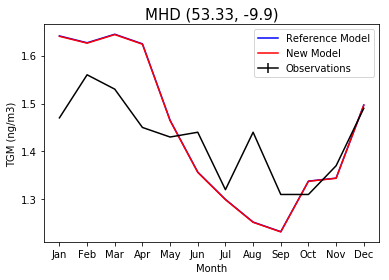

<Figure size 432x288 with 0 Axes>

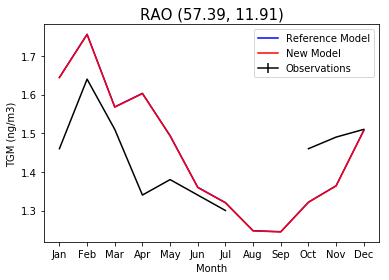

<Figure size 432x288 with 0 Axes>

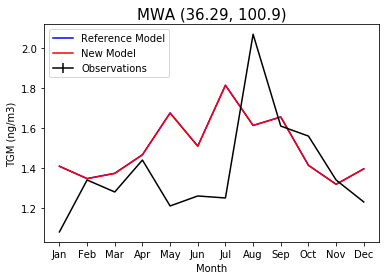

<Figure size 432x288 with 0 Axes>

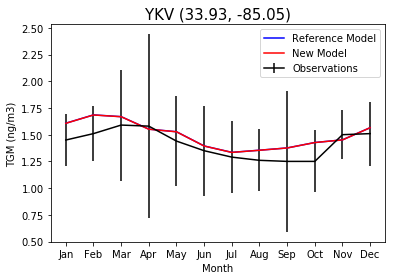

<Figure size 432x288 with 0 Axes>

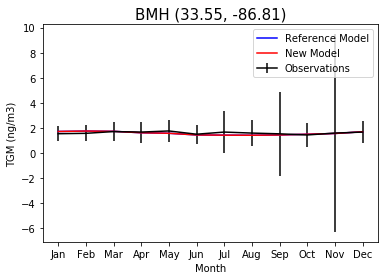

<Figure size 432x288 with 0 Axes>

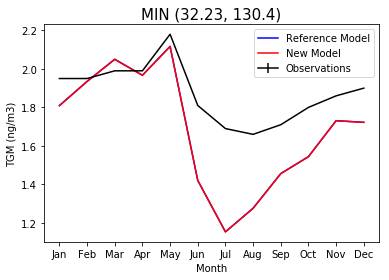

<Figure size 432x288 with 0 Axes>

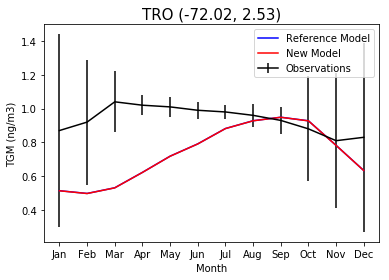

<Figure size 432x288 with 0 Axes>

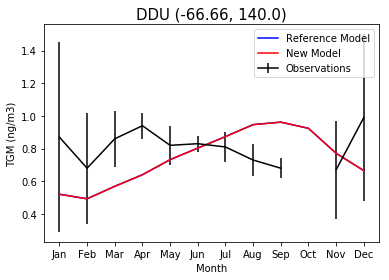

<Figure size 432x288 with 0 Axes>

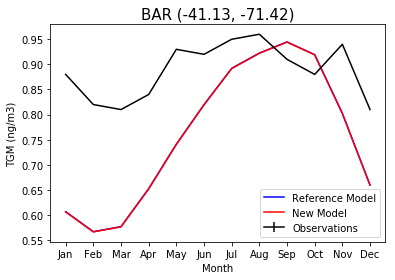

<Figure size 432x288 with 0 Axes>

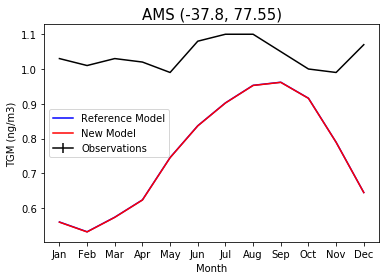

<Figure size 432x288 with 0 Axes>

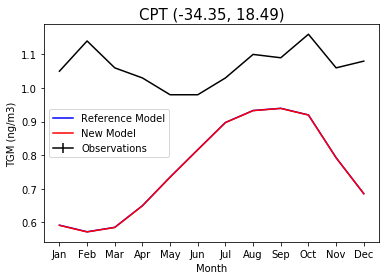

<Figure size 432x288 with 0 Axes>

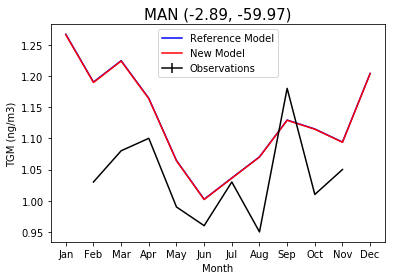

<Figure size 432x288 with 0 Axes>

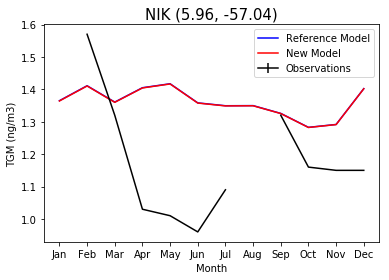

<Figure size 432x288 with 0 Axes>

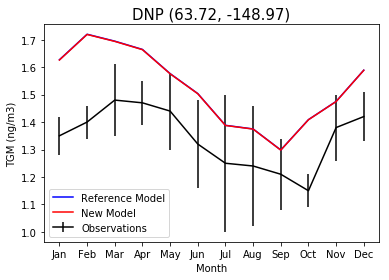

<Figure size 432x288 with 0 Axes>

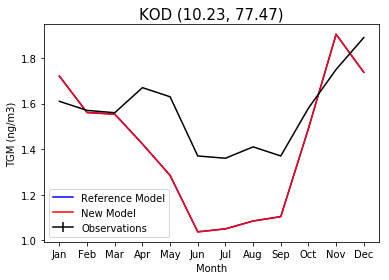

<Figure size 432x288 with 0 Axes>

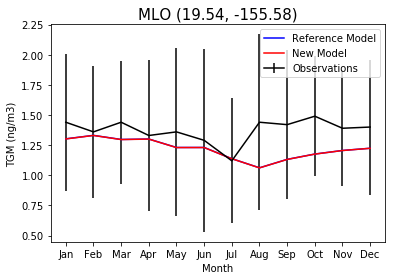

<Figure size 432x288 with 0 Axes>

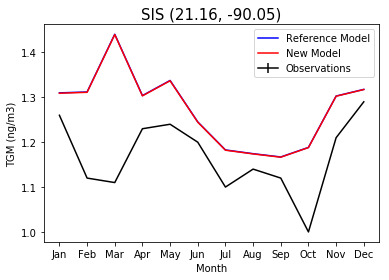

<Figure size 432x288 with 0 Axes>

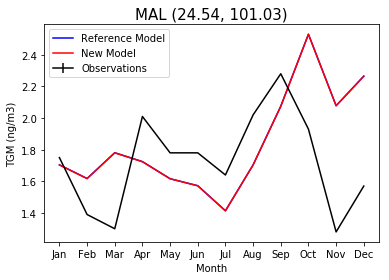

<Figure size 432x288 with 0 Axes>

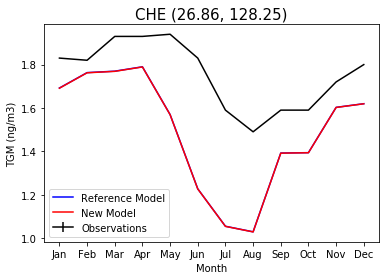

<Figure size 432x288 with 0 Axes>

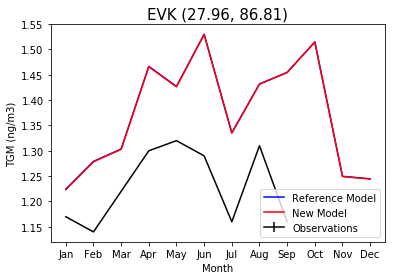

<Figure size 432x288 with 0 Axes>

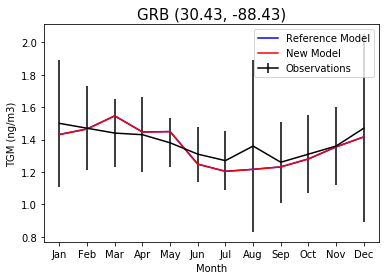

<Figure size 432x288 with 0 Axes>

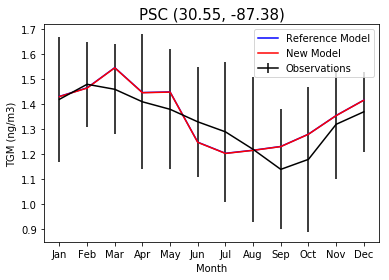

<Figure size 432x288 with 0 Axes>

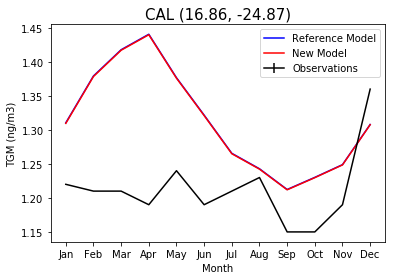

<Figure size 432x288 with 0 Axes>

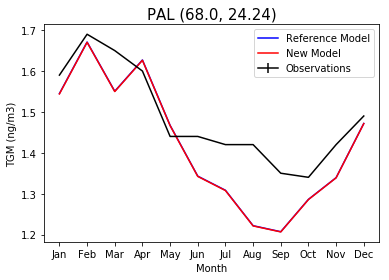

<Figure size 432x288 with 0 Axes>

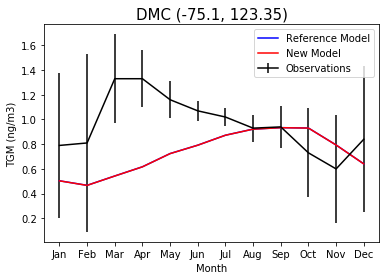

<Figure size 432x288 with 0 Axes>

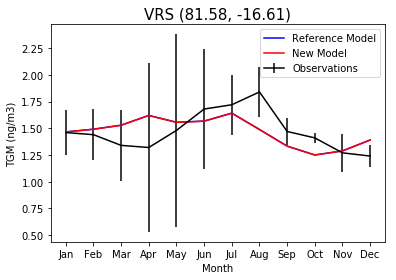

<Figure size 432x288 with 0 Axes>

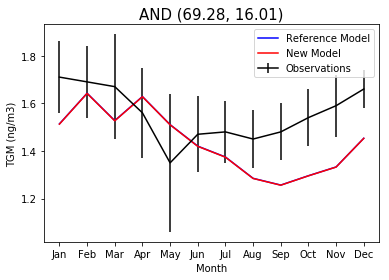

<Figure size 432x288 with 0 Axes>

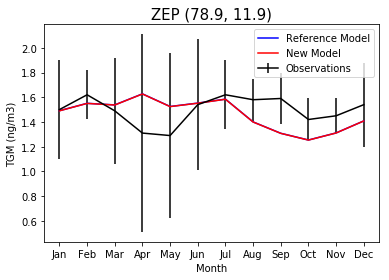

In [4]:
# Create a for loop in order to graph values for each unique site

for SiteID in HgobsOrder[ 'SiteID'].unique():
  

    # Select all values with the same Site ID
    Dataset = HgobsOrder[HgobsOrder.SiteID == SiteID].reset_index()
    
    
    # Specify the first latitude and longitude of the Site ID 
    Lat=Dataset.Lat[0]
    Lon=Dataset.Lon[0]
    
    
    # Specify the latitude and longitude where data should be extracted from for both reference and new models.
    OLD_mod= (TGM_Old.sel(lat=Lat, lon=Lon, method='nearest'))
    NEW_mod= (TGM_New.sel(lat=Lat, lon=Lon, method='nearest'))

    
    # Convert the time data from a float to a string, specifying months for graph labels
    Dataset.index=pd.to_datetime(Dataset.Month, format='%m')

    
    # Add a plot 
    plt.figure()
    
    
    # Add the data from the observations, the reference model and the new model
    ax=Dataset.plot(x='Month', y='Concentration',yerr='Standard deviation' ,color= "k")
    ax.plot(Dataset.Month,OLD_mod.data,color='blue')
    ax.plot(Dataset.Month,NEW_mod.data,color='red')
    
    
    # Label the axes, add a legend and add a title
    plt.xlabel('Month')
    plt.ylabel('TGM (ng/m3)')
    plt.legend([ 'Reference Model','New Model', 'Observations'])
    plt.title('{0} ({1}, {2})'.format(SiteID, Lat, Lon), fontsize=15)
    
    
    # Set ticks to every month 
    ax.set_xticks(Dataset.Month)
    
    
    # Set tick labels to month names
    ax.set_xticklabels(Dataset.index.strftime('%b'))
    
    
    # Show the plot
    plt.show()

In [8]:
# Name the xbpch files for the reference and new models
OLD = '/home/brittany/Documents/HG/pythonHgBenchmark/trac_avg.geosfp_2x25_Hg.v12-01.bpch'
NEW = '/home/brittany/Documents/HG/pythonHgBenchmark/trac_avg.geosfp_2x25_Hg.v12-01.new.bpch'
COL_OLD= '/home/brittany/Documents/HG/pythonHg/horowitz17.bpch'
COL_NEW= '/home/brittany/Documents/HG/pythonHg/v11-02.bpch'


# Upload/open the data from the models 
OLD_ds = (xbpch.open_bpchdataset(OLD))
NEW_ds = (xbpch.open_bpchdataset(NEW))

COLD_ds = (xbpch.open_bpchdataset(COL_OLD,
           tracerinfo_file='/home/brittany/Documents/HG/pythonHg/tracerinfo.horowitz17.dat',
           diaginfo_file='/home/brittany/Documents/HG/pythonHg/diaginfo.horowitz17.dat'))  

CNEW_ds = (xbpch.open_bpchdataset(COL_NEW, tracerinfo_file='/home/brittany/Documents/HG/pythonHg/tracerinfo.dat',
           diaginfo_file='/home/brittany/Documents/HG/pythonHg/diaginfo.dat'))

          

In [15]:
# Create a for loop in order to graph values for each unique site

def PlotSeasonSites(Dataset_OLD=OLD_ds, Dataset_NEW=NEW_ds, Obs_loc=Hgobs):
    

    
    
    
    
    # Arrange the data by order of latitude and ensure when graphs are plotted the data is sequential
    Graph_order=Obs_loc.sort_values(by=['Lat'], ascending=0)
    HgobsOrder=Graph_order.sort_values(by=['Month'])

    # Make a variable for the unit conversion factor to obtain ng/m^3
    Unit_Conversion= 8.93


    # Extract and add together Hg0 and Hg2 at the surface from the reference model multiplying by the unit converion factor 
    # to obtain values for Total Gaseous Mercury.
    OLD_Hg0 =((Dataset_OLD['IJ_AVG_S_Hg0'].isel(lev=0)) * Unit_Conversion)                              
    OLD_Hg2 =((Dataset_OLD['IJ_AVG_S_Hg2'].isel(lev=0)) * Unit_Conversion)                
    TGM_Old = (OLD_Hg0 + OLD_Hg2)/1e12


    # Extract and add together Hg0 and Hg2 at the surface from the new model multiplying by the unit converion factor 
    # to obtain values for Total Gaseous Mercury.
    NEW_Hg0 =((Dataset_NEW['IJ_AVG_S_Hg0'].isel(lev=0) * Unit_Conversion))                         
    NEW_Hg2 =((Dataset_NEW['IJ_AVG_S_Hg2'].isel(lev=0) * Unit_Conversion))
    TGM_New =( NEW_Hg0 + NEW_Hg2)
    
    
    
    
    for SiteID in HgobsOrder[ 'SiteID'].unique():
  

        # Select all values with the same Site ID
        Dataset = HgobsOrder[HgobsOrder.SiteID == SiteID].reset_index()
    
    
        # Specify the first latitude and longitude of the Site ID 
        Lat=Dataset.Lat[0]
        Lon=Dataset.Lon[0]
    
    
        # Specify the latitude and longitude where data should be extracted from for both reference and new models.
        OLD_mod= (TGM_Old.sel(lat=Lat, lon=Lon, method='nearest'))
        NEW_mod= (TGM_New.sel(lat=Lat, lon=Lon, method='nearest'))

    
        # Convert the time data from a float to a string, specifying months for graph labels
        Dataset.index=pd.to_datetime(Dataset.Month, format='%m')

        
        # Add a plot 
        plt.figure()
        
    
        # Add the data from the observations, the reference model and the new model
        ax=Dataset.plot(x='Month', y='Concentration',yerr='Standard deviation' ,color= "k")
        ax.plot(Dataset.Month,OLD_mod.data,color='blue')
        ax.plot(Dataset.Month,NEW_mod.data,color='red')
    
    
        # Label the axes, add a legend and add a title
        plt.xlabel('Month')
        plt.ylabel('TGM (ng/m3)')
        plt.legend([ 'Reference Model','New Model', 'Observations'])
        plt.title('{0} ({1}, {2})'.format(SiteID, Lat, Lon), fontsize=15)
    
    
        # Set ticks to every month 
        ax.set_xticks(Dataset.Month)
    
    
        # Set tick labels to month names
        ax.set_xticklabels(Dataset.index.strftime('%b'))
    
    
        # Show the plot
        graph= plt.show()
    return graph

<Figure size 432x288 with 0 Axes>

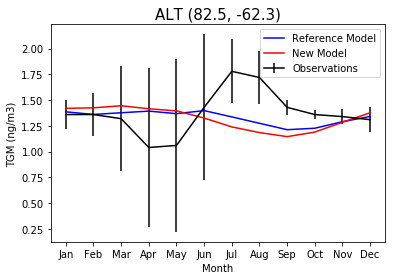

<Figure size 432x288 with 0 Axes>

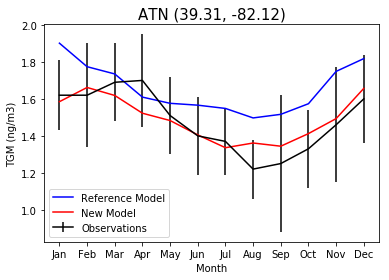

<Figure size 432x288 with 0 Axes>

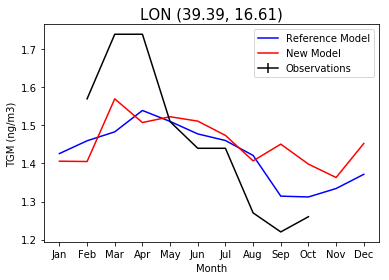

<Figure size 432x288 with 0 Axes>

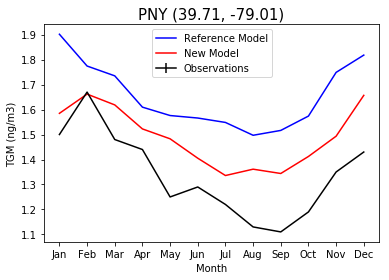

<Figure size 432x288 with 0 Axes>

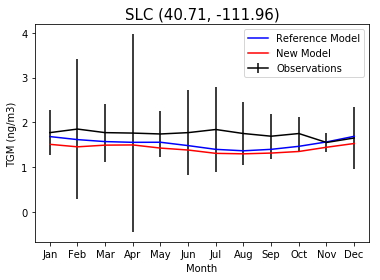

<Figure size 432x288 with 0 Axes>

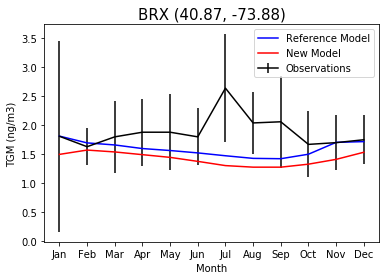

<Figure size 432x288 with 0 Axes>

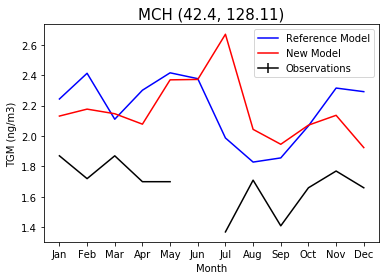

<Figure size 432x288 with 0 Axes>

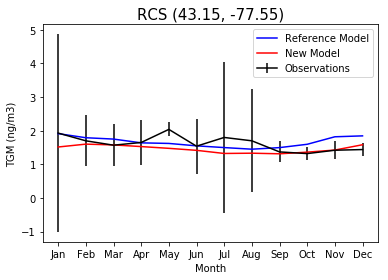

<Figure size 432x288 with 0 Axes>

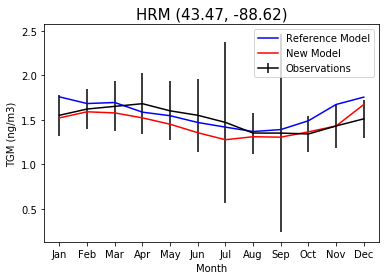

<Figure size 432x288 with 0 Axes>

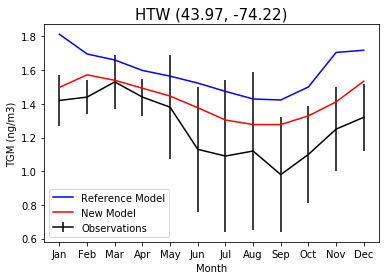

<Figure size 432x288 with 0 Axes>

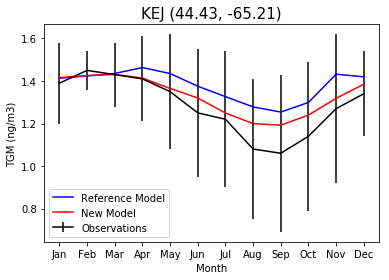

<Figure size 432x288 with 0 Axes>

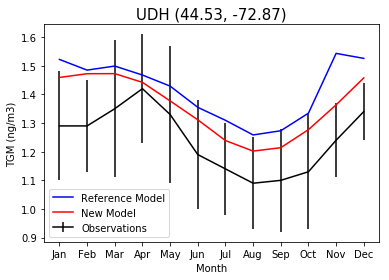

<Figure size 432x288 with 0 Axes>

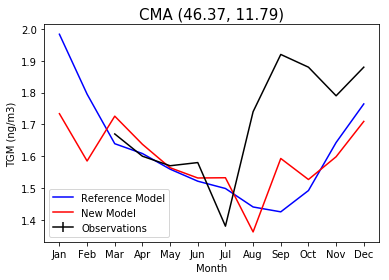

<Figure size 432x288 with 0 Axes>

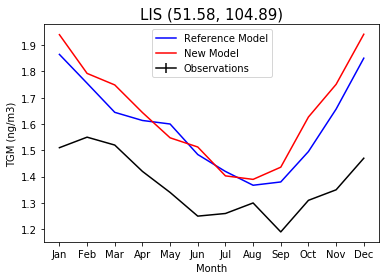

<Figure size 432x288 with 0 Axes>

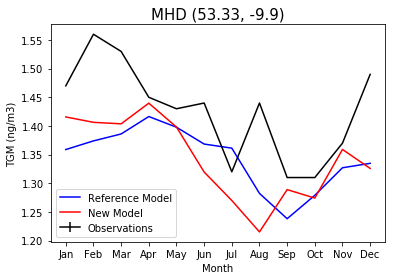

<Figure size 432x288 with 0 Axes>

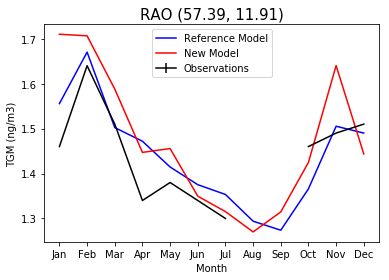

<Figure size 432x288 with 0 Axes>

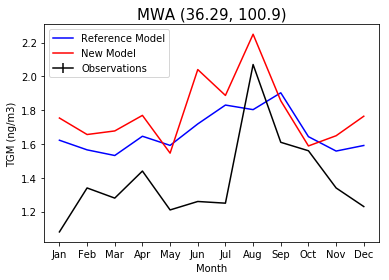

<Figure size 432x288 with 0 Axes>

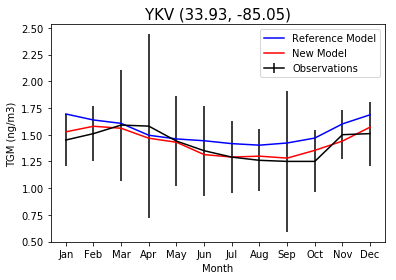

<Figure size 432x288 with 0 Axes>

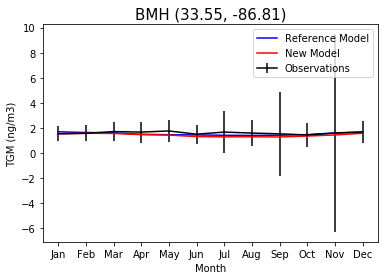

<Figure size 432x288 with 0 Axes>

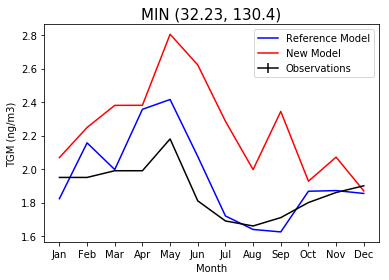

<Figure size 432x288 with 0 Axes>

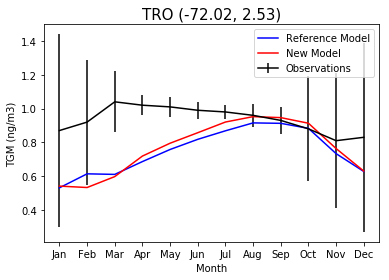

<Figure size 432x288 with 0 Axes>

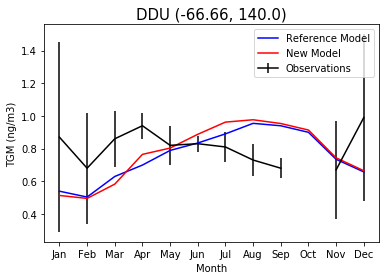

<Figure size 432x288 with 0 Axes>

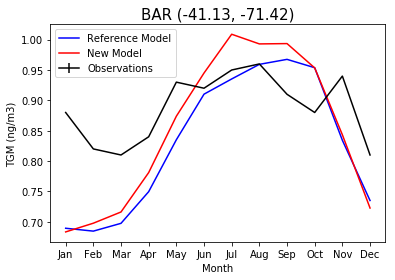

<Figure size 432x288 with 0 Axes>

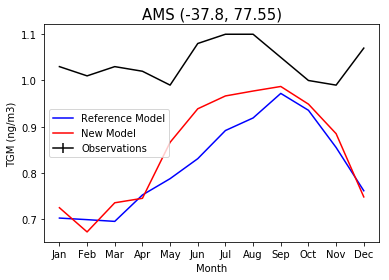

<Figure size 432x288 with 0 Axes>

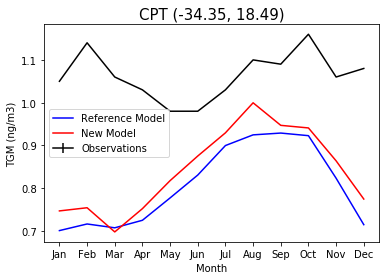

<Figure size 432x288 with 0 Axes>

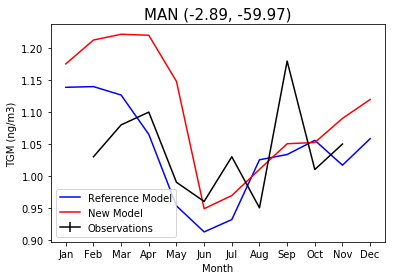

<Figure size 432x288 with 0 Axes>

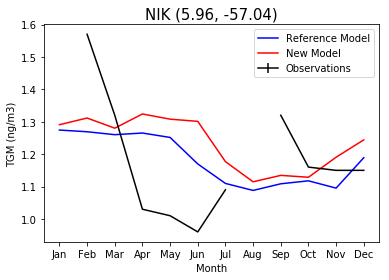

<Figure size 432x288 with 0 Axes>

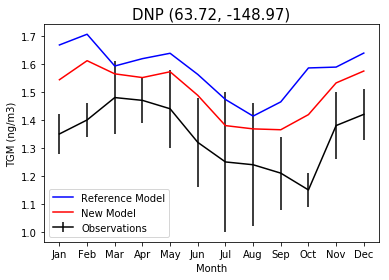

<Figure size 432x288 with 0 Axes>

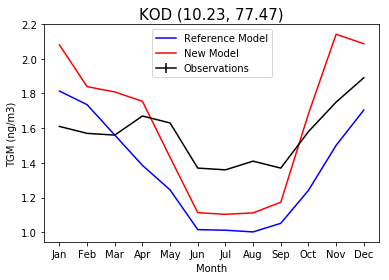

<Figure size 432x288 with 0 Axes>

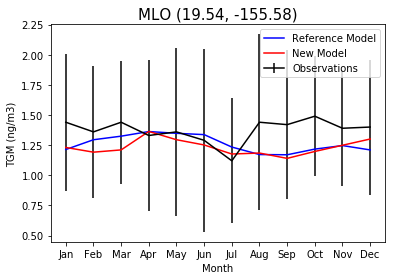

<Figure size 432x288 with 0 Axes>

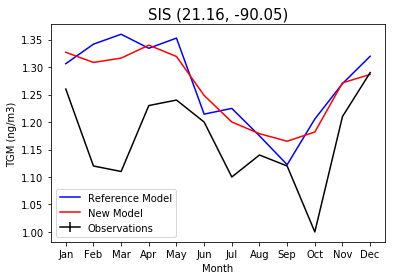

<Figure size 432x288 with 0 Axes>

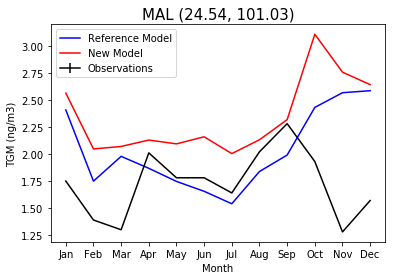

<Figure size 432x288 with 0 Axes>

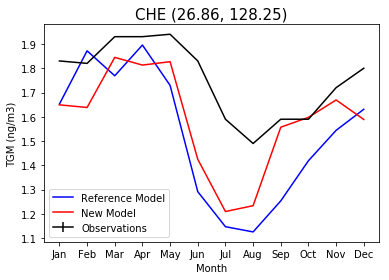

<Figure size 432x288 with 0 Axes>

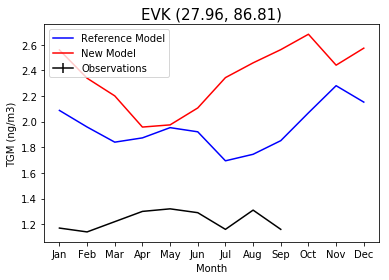

<Figure size 432x288 with 0 Axes>

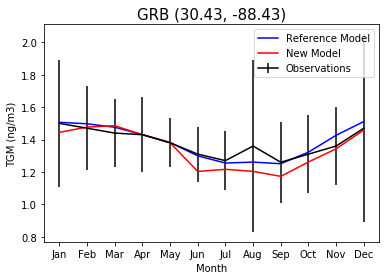

<Figure size 432x288 with 0 Axes>

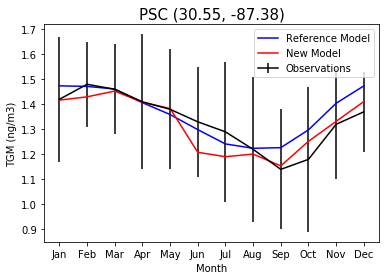

<Figure size 432x288 with 0 Axes>

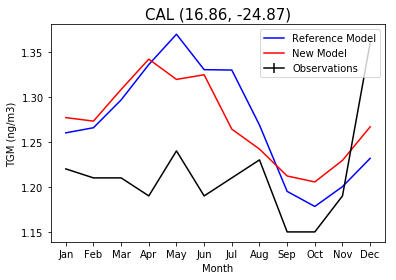

<Figure size 432x288 with 0 Axes>

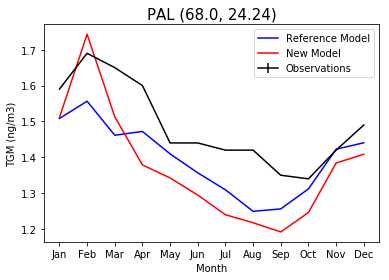

<Figure size 432x288 with 0 Axes>

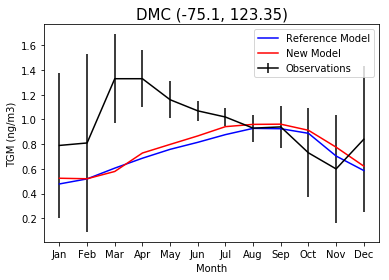

<Figure size 432x288 with 0 Axes>

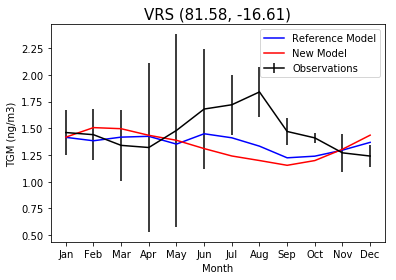

<Figure size 432x288 with 0 Axes>

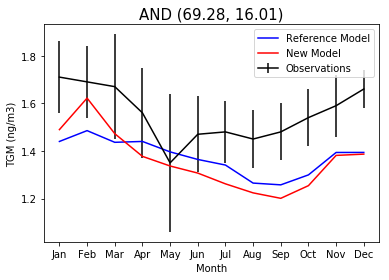

<Figure size 432x288 with 0 Axes>

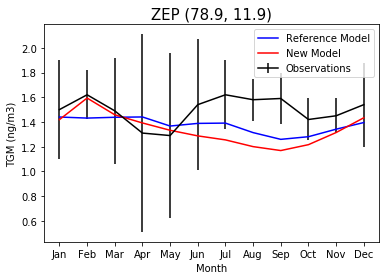

In [16]:
PlotSeasonSites(Dataset_OLD=COLD_ds, Dataset_NEW=CNEW_ds, Obs_loc=Hgobs)

<Figure size 432x288 with 0 Axes>

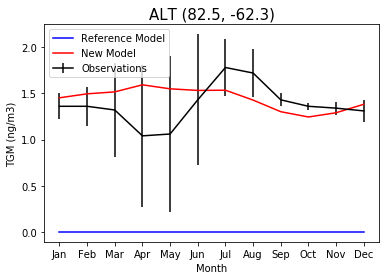

<Figure size 432x288 with 0 Axes>

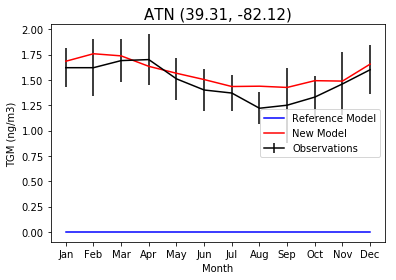

<Figure size 432x288 with 0 Axes>

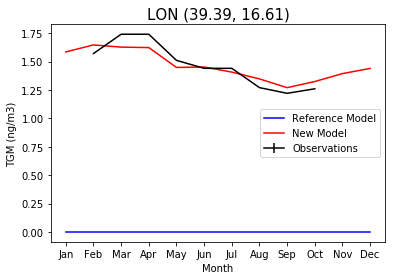

<Figure size 432x288 with 0 Axes>

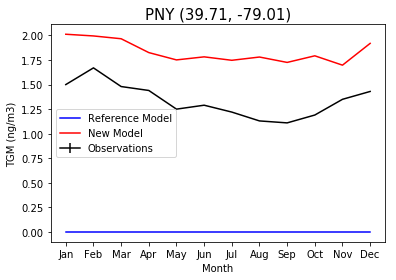

<Figure size 432x288 with 0 Axes>

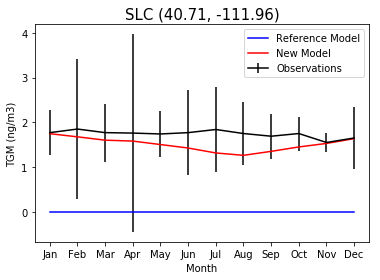

<Figure size 432x288 with 0 Axes>

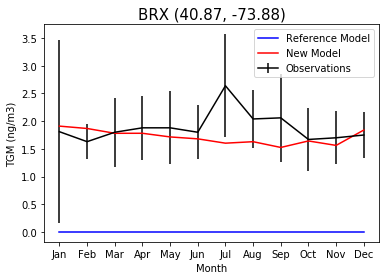

<Figure size 432x288 with 0 Axes>

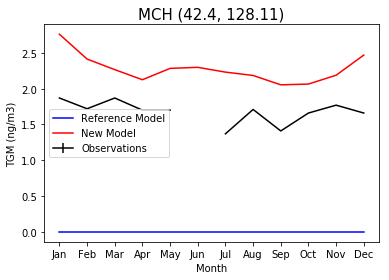

<Figure size 432x288 with 0 Axes>

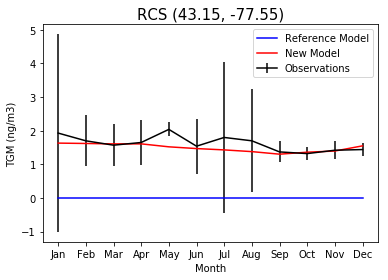

<Figure size 432x288 with 0 Axes>

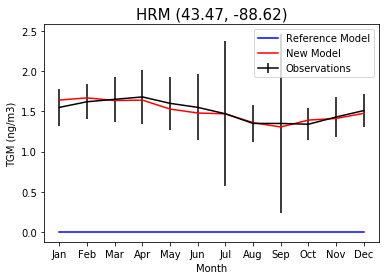

<Figure size 432x288 with 0 Axes>

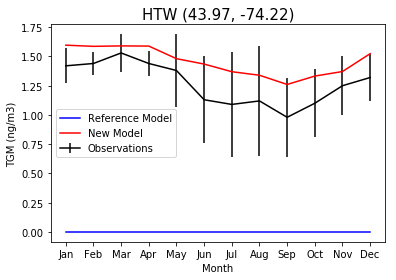

<Figure size 432x288 with 0 Axes>

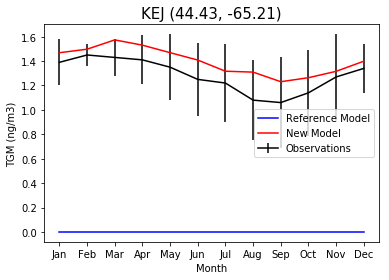

<Figure size 432x288 with 0 Axes>

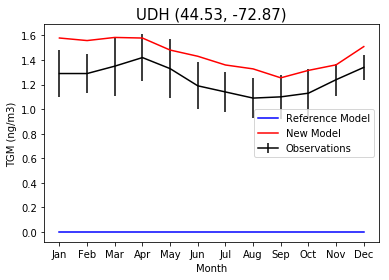

<Figure size 432x288 with 0 Axes>

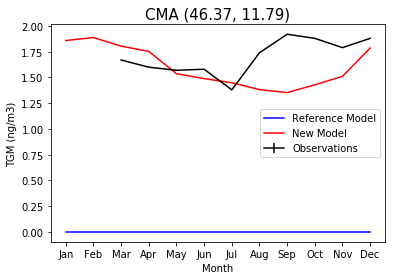

<Figure size 432x288 with 0 Axes>

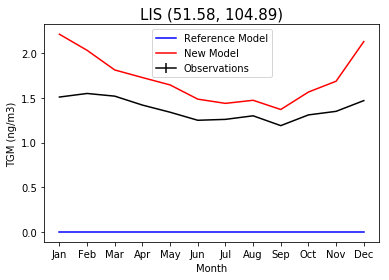

<Figure size 432x288 with 0 Axes>

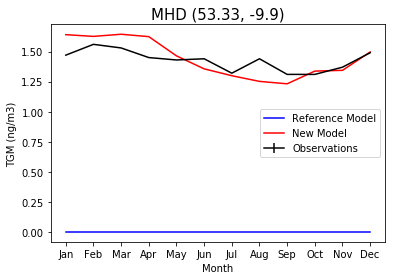

<Figure size 432x288 with 0 Axes>

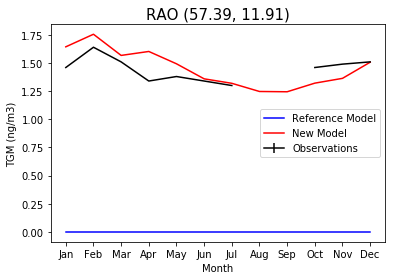

<Figure size 432x288 with 0 Axes>

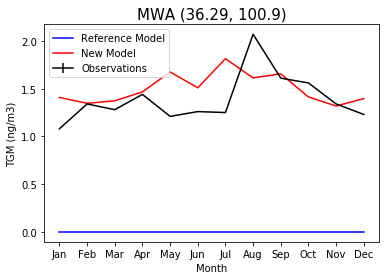

<Figure size 432x288 with 0 Axes>

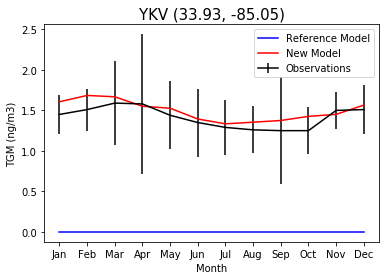

<Figure size 432x288 with 0 Axes>

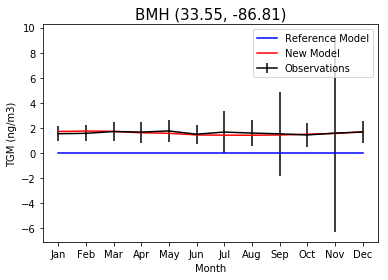

<Figure size 432x288 with 0 Axes>

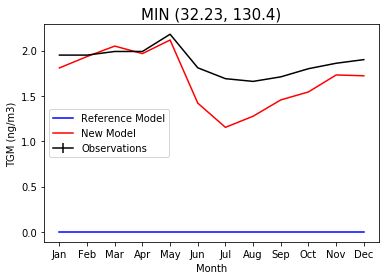

<Figure size 432x288 with 0 Axes>

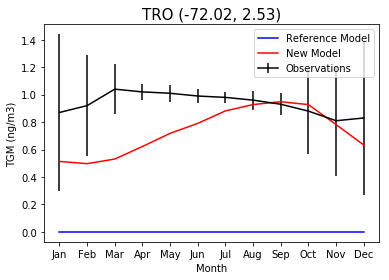

<Figure size 432x288 with 0 Axes>

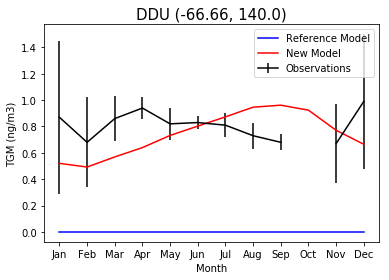

<Figure size 432x288 with 0 Axes>

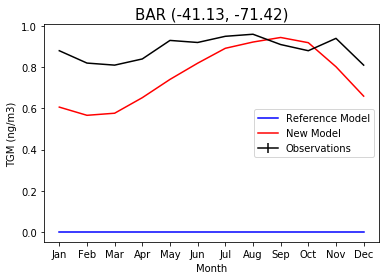

<Figure size 432x288 with 0 Axes>

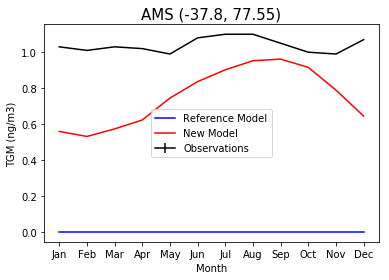

<Figure size 432x288 with 0 Axes>

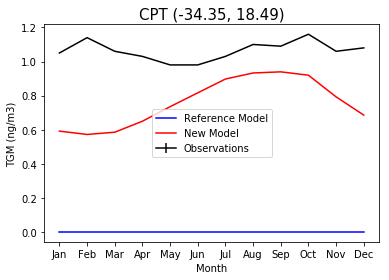

<Figure size 432x288 with 0 Axes>

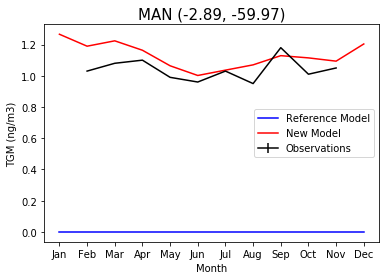

<Figure size 432x288 with 0 Axes>

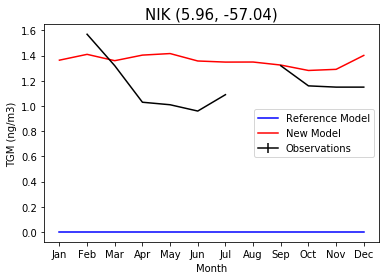

<Figure size 432x288 with 0 Axes>

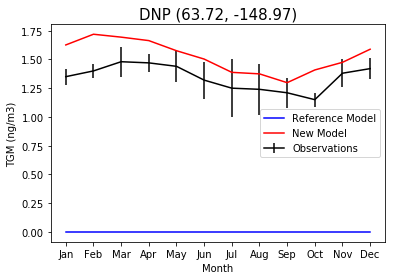

<Figure size 432x288 with 0 Axes>

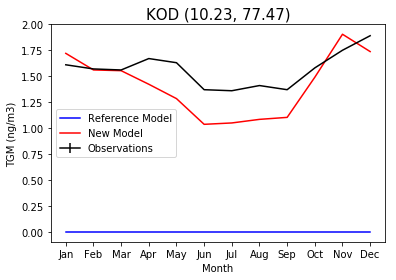

<Figure size 432x288 with 0 Axes>

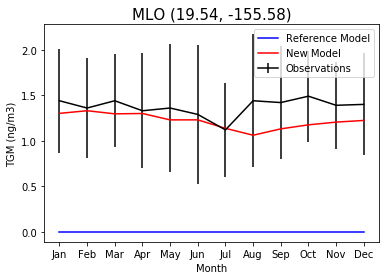

<Figure size 432x288 with 0 Axes>

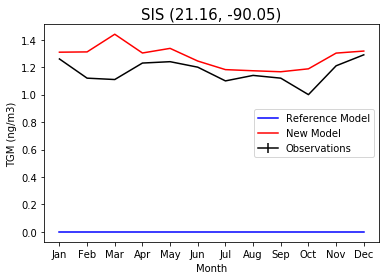

<Figure size 432x288 with 0 Axes>

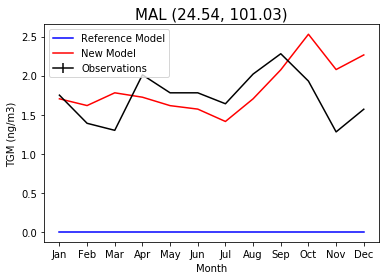

<Figure size 432x288 with 0 Axes>

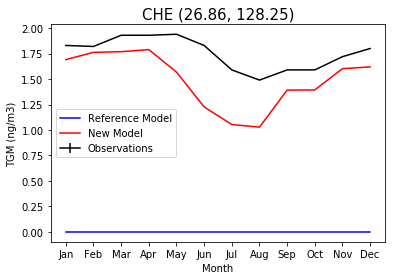

<Figure size 432x288 with 0 Axes>

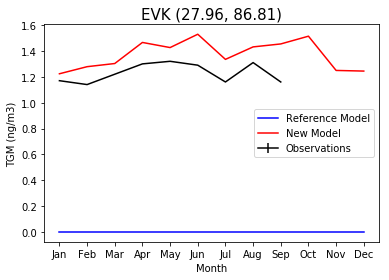

<Figure size 432x288 with 0 Axes>

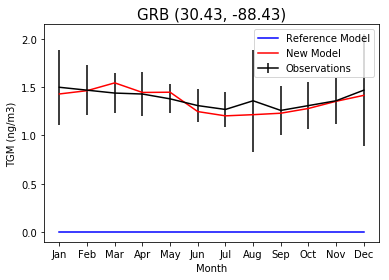

<Figure size 432x288 with 0 Axes>

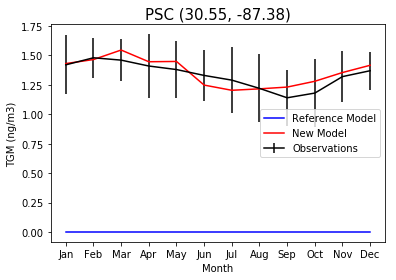

<Figure size 432x288 with 0 Axes>

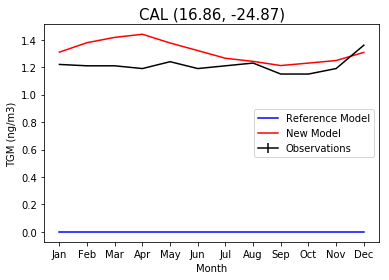

<Figure size 432x288 with 0 Axes>

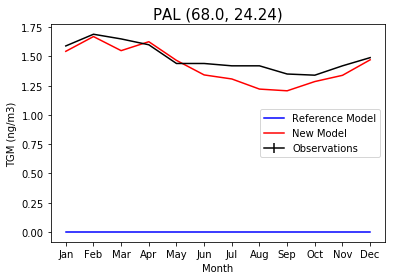

<Figure size 432x288 with 0 Axes>

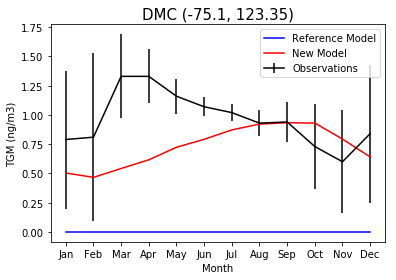

<Figure size 432x288 with 0 Axes>

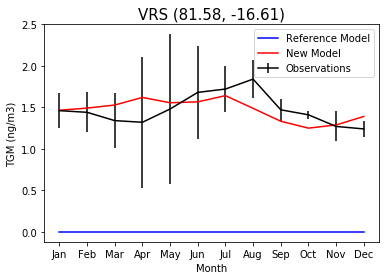

<Figure size 432x288 with 0 Axes>

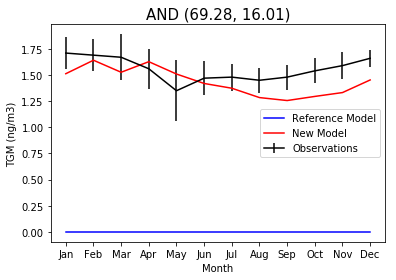

<Figure size 432x288 with 0 Axes>

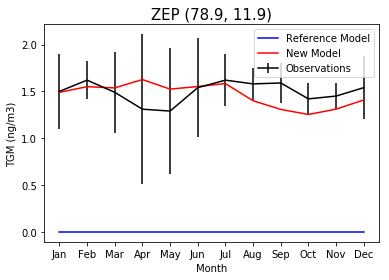

In [17]:
PlotSeasonSites()